In [140]:
import pandas as pd

In [141]:
merged_df=pd.read_csv("output.csv")

In [142]:
merged_df.head()

,Title,Price,Location,URL,Day,Month,Year
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,$100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022
1,Crate and Barrel Midcentury Letta Geo Rug.,$125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023
2,Petite Entertainment Unit,$100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",$75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022
4,Enamel top vintage table,$265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022


In [143]:
merged_df=merged_df.iloc[:,0:7]

In [144]:
merged_df.head()

,Title,Price,Location,URL,Day,Month,Year
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,$100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022
1,Crate and Barrel Midcentury Letta Geo Rug.,$125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023
2,Petite Entertainment Unit,$100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",$75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022
4,Enamel top vintage table,$265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022


In [145]:
def remove_dol(price):
    if pd.notna(price):
        result = str(price).strip("$")
        return result
    else:
        return None  # or any other value you prefer for NaN cases

# Assuming 'Price' is a column in merged_df
merged_df['Price'] = merged_df['Price'].apply(remove_dol)


In [146]:
merged_df.head()

,Title,Price,Location,URL,Day,Month,Year
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022
1,Crate and Barrel Midcentury Letta Geo Rug.,125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023
2,Petite Entertainment Unit,100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022
4,Enamel top vintage table,265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022


In [147]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     344 non-null    object
 1   Price     344 non-null    object
 2   Location  344 non-null    object
 3   URL       344 non-null    object
 4   Day       344 non-null    int64 
 5   Month     344 non-null    int64 
 6   Year      344 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 18.9+ KB


In [148]:
merged_df['Date']=merged_df['Day'].astype('str')+'/'+merged_df['Month'].astype('str')+'/'+merged_df['Year'].astype('str')

In [149]:
merged_df.head()

,Title,Price,Location,URL,Day,Month,Year,Date
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022,25/1/2022
1,Crate and Barrel Midcentury Letta Geo Rug.,125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023,23/7/2023
2,Petite Entertainment Unit,100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023,16/7/2023
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022,13/7/2022
4,Enamel top vintage table,265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022,14/2/2022


In [150]:

#modifying date column: 

def date(date):
    lis = date.split('/')
    
    if lis[1] in ['4', '6', '9', '11']:
        if lis[0] == '31':
            lis[0] = '30'
    elif lis[1] in ['2']:
        if lis[0] in ['29','30','31']:
            lis[0] = '28'
    
    return '/'.join(lis)

#modifying Date column 

merged_df['Date'] = merged_df['Date'].apply(date)


merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')
merged_df.sort_values(by='Date')

#modifying loc 

def location(loc):
    
        loc=loc.split('/')[0]
        loc=loc.split(',')[0]
        return loc
    
merged_df['Location']=merged_df['Location'].apply(location)

In [151]:
df = merged_df
# Extracting the name from the URL and creating a new column
df['Title_new'] = df['URL'].str.extract(r'/[^/]+/[^/]+/[^/]+/[^/]+/([^/]+)')

# Replacing hyphens and converting to a more readable format
df['Title_new'] = df['Title_new'].str.split('-', 1).str[1]
df['Title_new'] = df['Title_new'].str.replace('-', ' ')
df['Title_new'] = df['Title_new'].str.replace(r'[^a-zA-Z ]', '')

# Display the updated DataFrame
df.head()

C:\Users\andeysaikiran\AppData\Local\Temp\ipykernel_2224\2974568894.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Title_new'] = df['Title_new'].str.split('-', 1).str[1]
C:\Users\andeysaikiran\AppData\Local\Temp\ipykernel_2224\2974568894.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title_new'] = df['Title_new'].str.replace(r'[^a-zA-Z ]', '')


,Title,Price,Location,URL,Day,Month,Year,Date,Title_new
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022,2022-01-25,crate and barrel yumi blue
1,Crate and Barrel Midcentury Letta Geo Rug.,125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023,2023-07-23,crate and barrel midcentury
2,Petite Entertainment Unit,100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023,2023-07-16,petite entertainment unit
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022,2022-07-13,crate and barrel sawyer white
4,Enamel top vintage table,265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022,2022-02-14,enamel top vintage table


In [152]:
furniture_items_list = [
    'bed', 'chair', 'table', 'desk', 'dresser', 'couch', 'mirror', 'stool', 'cabinet', 'shelf',
    'lamp', 'sofa', 'chaise lounge', 'bench', 'ottoman', 'rocking chair', 'barstool', 'recliner',
    'nightstand', 'end table', 'coffee table', 'dining table', 'dining chair', 'office chair', 'armchair',
    'lounge chair', 'bookcase', 'media console', 'drawers', 'armoire', 'chest', 'chandelier',
    'floor lamp', 'side table', 'dining set', 'stools', 'love seat', 'outdoor furniture', 'sectional sofa', 'rug',
    'barrel', 'bookshelf', 'futon', 'vanity', 'buffet', 'sideboard', 'console table', 'accent chair',
    'folding chair', 'bunk bed', 'daybed', 'headboard', 'trundle bed', 'filing cabinet', 'hutch',
    'dining bench', 'bedside table', 'credenza', 'entertainment center', 'patio furniture', 'garden furniture',
    'pub table', 'wine rack', 'chest of drawers', 'display cabinet', 'writing desk', 'computer desk',
    'vanity table', 'hall tree', 'nesting tables', 'pouf', 'settee', 'chifforobe', 'shoe rack',
    'plant stand', 'room divider', 'kitchen island', 'bathroom vanity', 'office furniture'
]

# Function to choose the better title based on the presence of furniture terms
def choose_better_title(row):
    furniture_terms = furniture_items_list
    for term in furniture_terms:
        if term in row['Title_new']:
            return row['Title_new']
    return row['Title']

# Apply the function to create the Final_Title column
df['Final_Title'] = df.apply(choose_better_title, axis=1)

# Display the updated DataFrame
print(df[['Title', 'Price', 'Location', 'URL', 'Day', 'Month', 'Year', 'Date', 'Final_Title']])


                                                 Title Price         Location  \
0    Crate and Barrel Yumi Blue Multi-Color Rag Are...  100          Brigthon   
1           Crate and Barrel Midcentury Letta Geo Rug.  125            Boston   
2                            Petite Entertainment Unit  100            Boston   
3    Crate and Barrel Sawyer White Leaning 18" Book...   75            Boston   
4                             Enamel top vintage table  265           Belmont   
..                                                 ...   ...              ...   
339                                    Solid Wood Desk  175   Needham Heights   
340                                    Folding bed COT   85   Needham Heights   
341                            Low seat So comfortable   55   Needham Heights   
342                                 Swivel Black Chair   95   Needham Heights   
343                                      Slats for Bed   45   Needham Heights   

                           

In [153]:
# Predefined list of furniture items
furniture_items_list = [
    'bed', 'chair', 'table', 'desk', 'dresser', 'couch', 'mirror', 'stool', 'cabinet', 'shelf',
    'lamp', 'sofa', 'chaise lounge', 'bench', 'ottoman', 'rocking chair', 'barstool', 'recliner',
    'nightstand', 'end table', 'coffee table', 'dining table', 'dining chair', 'office chair', 'armchair',
    'lounge chair', 'bookcase', 'media console', 'drawers', 'armoire', 'chest', 'chandelier',
    'floor lamp', 'side table', 'dining set', 'stools', 'love seat', 'outdoor furniture', 'sectional sofa', 'rug',
    'barrel', 'bookshelf', 'futon', 'vanity', 'buffet', 'sideboard', 'console table', 'accent chair',
    'folding chair', 'bunk bed', 'daybed', 'headboard', 'trundle bed', 'filing cabinet', 'hutch',
    'dining bench', 'bedside table', 'credenza', 'entertainment center', 'patio furniture', 'garden furniture',
    'pub table', 'wine rack', 'chest of drawers', 'display cabinet', 'writing desk', 'computer desk',
    'vanity table', 'hall tree', 'nesting tables', 'pouf', 'settee', 'chifforobe', 'shoe rack',
    'plant stand', 'room divider', 'kitchen island', 'bathroom vanity', 'office furniture', 'entertainment unit','stand',
    'basket','workstation','flip top bar','door','frame','rack','mattress','vase','dining','drawer','blanket holder'
]

def extract_furniture_item(product_title):
    # Convert product title to lowercase for case-insensitive matching
    product_title_lower = product_title.lower()

    # Check if any furniture item is present in the product title
    for furniture_item in furniture_items_list:
        if furniture_item in product_title_lower:
            return furniture_item

    # If no furniture item is found, return None or any default value you prefer
    return None

# Apply the function to the 'title' column and create a new column 'furniture_item'
df['furniture_item'] = df['Final_Title'].apply(extract_furniture_item)

# Display the DataFrame with the new 'furniture_item' column
df.head()

,Title,Price,Location,URL,Day,Month,Year,Date,Title_new,Final_Title,furniture_item
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022,2022-01-25,crate and barrel yumi blue,crate and barrel yumi blue,barrel
1,Crate and Barrel Midcentury Letta Geo Rug.,125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023,2023-07-23,crate and barrel midcentury,crate and barrel midcentury,barrel
2,Petite Entertainment Unit,100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023,2023-07-16,petite entertainment unit,Petite Entertainment Unit,entertainment unit
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022,2022-07-13,crate and barrel sawyer white,crate and barrel sawyer white,barrel
4,Enamel top vintage table,265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022,2022-02-14,enamel top vintage table,enamel top vintage table,table


In [154]:
filtered_rows = df[df['furniture_item'].isna() | (df['furniture_item'] == 'None')]
df.dropna(how='any')
df.head()

,Title,Price,Location,URL,Day,Month,Year,Date,Title_new,Final_Title,furniture_item
0,Crate and Barrel Yumi Blue Multi-Color Rag Are...,100,Brigthon,https://boston.craigslist.org/gbs/fuo/d/bright...,25,1,2022,2022-01-25,crate and barrel yumi blue,crate and barrel yumi blue,barrel
1,Crate and Barrel Midcentury Letta Geo Rug.,125,Boston,https://boston.craigslist.org/gbs/fuo/d/bright...,23,7,2023,2023-07-23,crate and barrel midcentury,crate and barrel midcentury,barrel
2,Petite Entertainment Unit,100,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,16,7,2023,2023-07-16,petite entertainment unit,Petite Entertainment Unit,entertainment unit
3,"Crate and Barrel Sawyer White Leaning 18"" Book...",75,Boston,https://boston.craigslist.org/gbs/fuo/d/boston...,13,7,2022,2022-07-13,crate and barrel sawyer white,crate and barrel sawyer white,barrel
4,Enamel top vintage table,265,Belmont,https://boston.craigslist.org/bmw/fuo/d/belmon...,14,2,2022,2022-02-14,enamel top vintage table,enamel top vintage table,table


In [155]:
import geocoder
import pandas as pd
from tqdm import tqdm

# Define a function to get latitude and longitude
def get_lat_lng(address):
    result = geocoder.arcgis(address)
    if result.ok:
        return result.latlng
    else:
        return [None, None]  # Return None values if the geocode failed

# Create empty lists to store latitude and longitude
latitudes = []
longitudes = []

# Use tqdm as a context manager to display a progress bar
with tqdm(total=len(df)) as pbar:
    # Iterate over the DataFrame's rows
    for index, row in df.iterrows():
        lat, lng = get_lat_lng(row['Location'])
        latitudes.append(lat)
        longitudes.append(lng)
        
        # Update the progress bar
        pbar.update(1)

# Add the latitude and longitude lists as new columns to the DataFrame
df['latitude'] = latitudes
df['longitude'] = longitudes


100%|████████████████████████████████████████████████████████████████████████████████| 344/344 [03:01<00:00,  1.89it/s]


C:\Users\andeysaikiran\AppData\Local\Temp\ipykernel_2224\2262526422.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


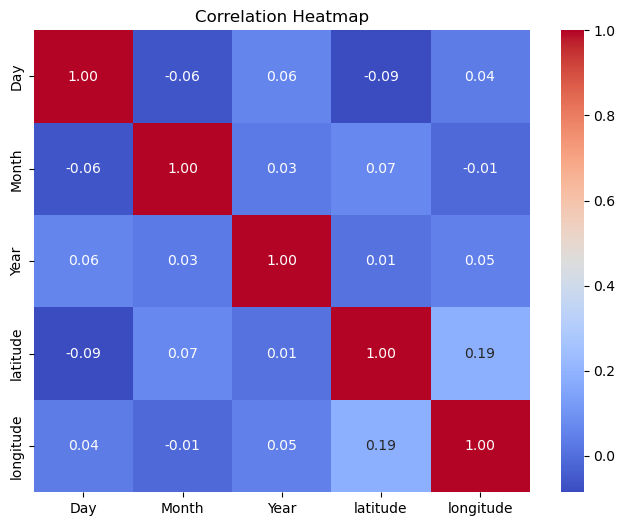

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [157]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from tqdm import tqdm

# Create a DataFrame for unique locations
locations = pd.DataFrame({"Name": df['Location'].unique()})

# Function to get latitude and longitude using geopy
def get_lat_lng(location):
    geolocator = Nominatim(user_agent="app")
    location = geolocator.geocode(location)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return np.nan, np.nan

# Get latitude and longitude for each location
tqdm.pandas()
locations['geo_loc'] = locations['Name'].progress_apply(get_lat_lng)

# Extract latitude and longitude
locations[['Latitude', 'Longitude']] = pd.DataFrame(locations['geo_loc'].tolist(), index=locations.index)

# Save locations to a CSV file
locations.to_csv('locations.csv', index=False)

# Create a DataFrame for locations in the original DataFrame
Rest_locations = pd.DataFrame(df['Location'].value_counts().reset_index())
Rest_locations.columns = ['Name', 'count']
Rest_locations = Rest_locations.merge(locations, on='Name', how="left").dropna()

# Function to generate a base map
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

# Extract latitude and longitude
lat, lon = Rest_locations['Latitude'].values, Rest_locations['Longitude'].values
Rest_locations['lat'] = lat
Rest_locations['lon'] = lon

# Generate base map
basemap = generateBaseMap()

# Add heatmap layer
HeatMap(Rest_locations[['lat', 'lon', 'count']].values.tolist(), radius=15).add_to(basemap)

# Display the map
basemap


100%|████████████████████████████████████████████████████████████████████████████████| 104/104 [01:05<00:00,  1.59it/s]


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
print(df.columns)  # Check the column names
plt.figure(figsize=(12, 6))

# Update the column name if needed
sns.countplot(x='Furniture_item', data=df, order=df['Furniture_item'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Furniture Type')
plt.ylabel('Count')
plt.title('Count of Each Furniture Type')
plt.tight_layout()
plt.show()


Index(['Title', 'Price', 'Location', 'URL', 'Day', 'Month', 'Year', 'Date',
       'Title_new', 'Final_Title', 'furniture_item', 'latitude', 'longitude'],
      dtype='object')


KeyError: 'Furniture_item'

<Figure size 1200x600 with 0 Axes>

In [159]:
df['furniture_item']

0                  barrel
1                  barrel
2      entertainment unit
3                  barrel
4                   table
              ...        
339                  desk
340                   bed
341                 table
342                 chair
343                   bed
Name: furniture_item, Length: 344, dtype: object